Imports
---

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Data ([Source](https://beta.data.gov.sg/collections/189/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view))
---

In [2]:
# Load data
df = pd.read_csv('../data/question1/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
print(df.shape)
df.head()

(185506, 11)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


Preparation
---

In [3]:
# Check for any columns with missing values or single-variance
# Missing values check
missing_values = df.isnull().sum()

# No variance check
no_variance_columns = df.nunique()[df.nunique() == 1]

missing_values, no_variance_columns

(month                  0
 town                   0
 flat_type              0
 block                  0
 street_name            0
 storey_range           0
 floor_area_sqm         0
 flat_model             0
 lease_commence_date    0
 remaining_lease        0
 resale_price           0
 dtype: int64,
 Series([], dtype: int64))

Analysis
---

In [4]:
# Convert month from string to datetime 
df['month'] = pd.to_datetime(df['month'], format="%Y-%m")

# Define function to mark key periods
def categorize_period(date):
    if date < pd.Timestamp('2018-01-01'):
        return 'pre-portal'
    elif pd.Timestamp('2020-01-01') <= date <= pd.Timestamp('2021-12-31'):
        return 'covid-19'
    else:
        return 'post-portal'

# Apply the function to create the 'key_periods' column
df['key_periods'] = df['month'].apply(categorize_period)

print(df.shape)
df.head()


(185506, 12)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,key_periods
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,pre-portal
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,pre-portal
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,pre-portal
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,pre-portal
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,pre-portal


In [5]:
# Examining key phases distribution
df['key_periods'].value_counts(normalize=True)

key_periods
post-portal    0.606864
covid-19       0.282578
pre-portal     0.110557
Name: proportion, dtype: float64

In [6]:
# Filter to exclude rows marked as 'covid-19'
filtered_df = df[df['key_periods'] != 'covid-19']

print(filtered_df.shape)
filtered_df.head()

(133086, 12)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,key_periods
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,pre-portal
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,pre-portal
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,pre-portal
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,pre-portal
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,pre-portal


In [7]:
# Separate the data into pre-portal and post-portal
pre_portal_prices = filtered_df[filtered_df['key_periods'] == 'pre-portal']['resale_price']
post_portal_prices = filtered_df[filtered_df['key_periods'] == 'post-portal']['resale_price']

# Descriptive statistics
pre_portal_mean = pre_portal_prices.mean()
pre_portal_std = pre_portal_prices.std()
post_portal_mean = post_portal_prices.mean()
post_portal_std = post_portal_prices.std()

print(f'Avg resale price pre-portal: {round(pre_portal_mean, 2)}\n'
      f'Avg resale price post-portal: {round(post_portal_mean, 2)}\n'
      f'Std dev resale price pre-portal: {round(pre_portal_std, 2)}\n'
      f'Std dev resale price post-portal: {round(post_portal_std, 2)}')


Avg resale price pre-portal: 443888.52
Avg resale price post-portal: 518163.48
Std dev resale price pre-portal: 149148.32
Std dev resale price post-portal: 180771.74


In [8]:
# Normality test
pre_portal_normality = stats.shapiro(pre_portal_prices)
post_portal_normality = stats.shapiro(post_portal_prices)

print(f'Pre-Portal: Shapiro-Wilk Test results: {pre_portal_normality}\n'
      f'Post-Portal: Shapiro-Wilk Test results: {post_portal_normality}')

Pre-Portal: Shapiro-Wilk Test results: ShapiroResult(statistic=0.9133253551958965, pvalue=3.3595265863821332e-74)
Post-Portal: Shapiro-Wilk Test results: ShapiroResult(statistic=0.9538242990660303, pvalue=2.0305577745378168e-94)


/home/shilpa/miniforge3/envs/bookreview/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20509.
  res = hypotest_fun_out(*samples, **kwds)
/home/shilpa/miniforge3/envs/bookreview/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 112577.
  res = hypotest_fun_out(*samples, **kwds)


In [9]:
# Variance test
levene_test = stats.levene(pre_portal_prices, post_portal_prices)

print(f"Levene's test results: {levene_test}")

Levene's test results: LeveneResult(statistic=1228.4428817159042, pvalue=6.753679103266917e-268)


In [10]:
# Mann-Whitney U Test
mann_whitney_test = stats.mannwhitneyu(pre_portal_prices, post_portal_prices, alternative='two-sided')

print(f'Mann-Whitney U test results: {mann_whitney_test}')


Mann-Whitney U test results: MannwhitneyuResult(statistic=854866654.5, pvalue=0.0)


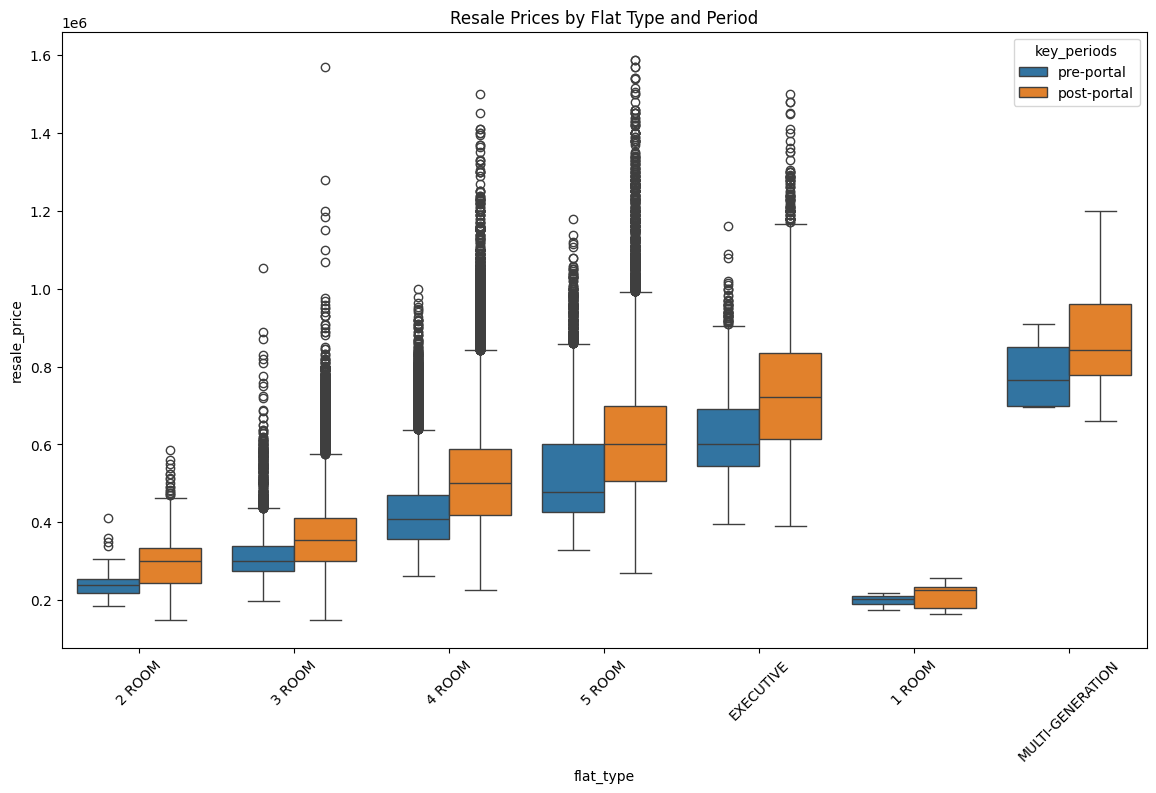

In [11]:
# Boxplot for resale prices by flat type and period
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='flat_type', y='resale_price', hue='key_periods')
plt.title('Resale Prices by Flat Type and Period')
plt.xticks(rotation=45)
plt.show()

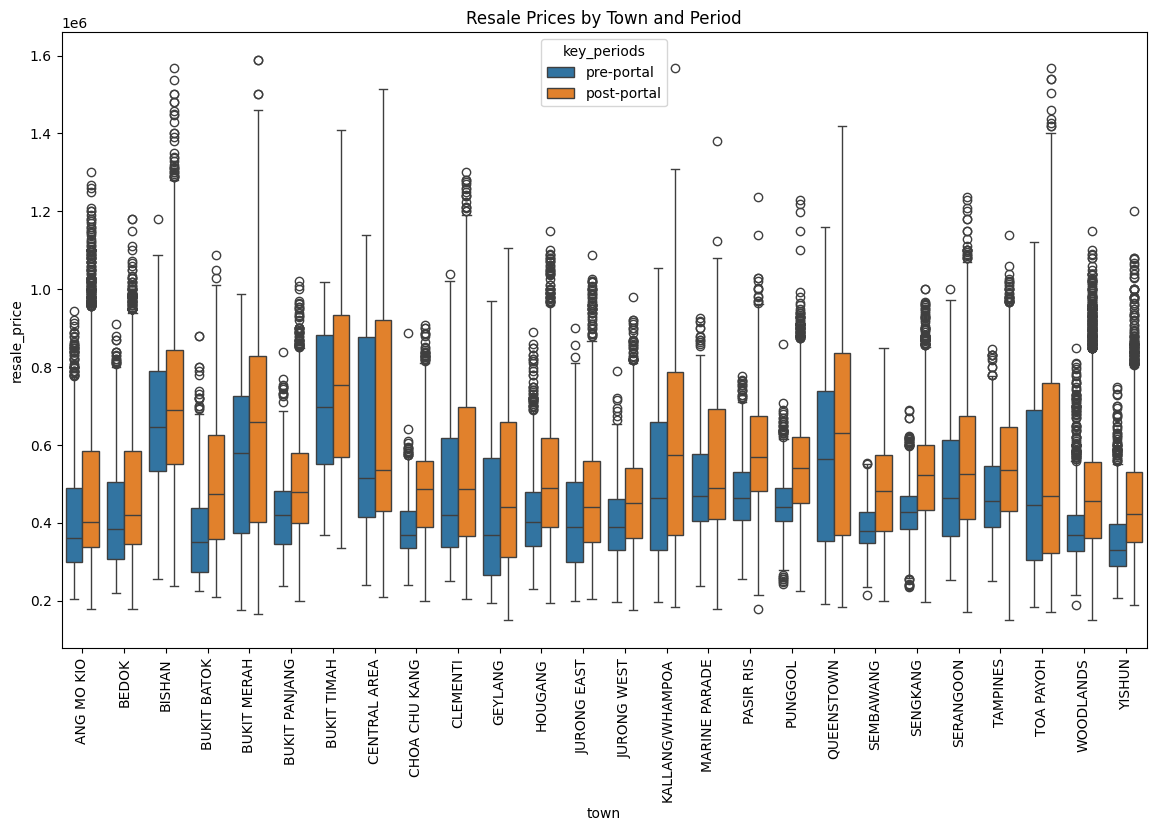

In [12]:
# Boxplot for resale prices by town and period
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='town', y='resale_price', hue='key_periods')
plt.title('Resale Prices by Town and Period')
plt.xticks(rotation=90)
plt.show()

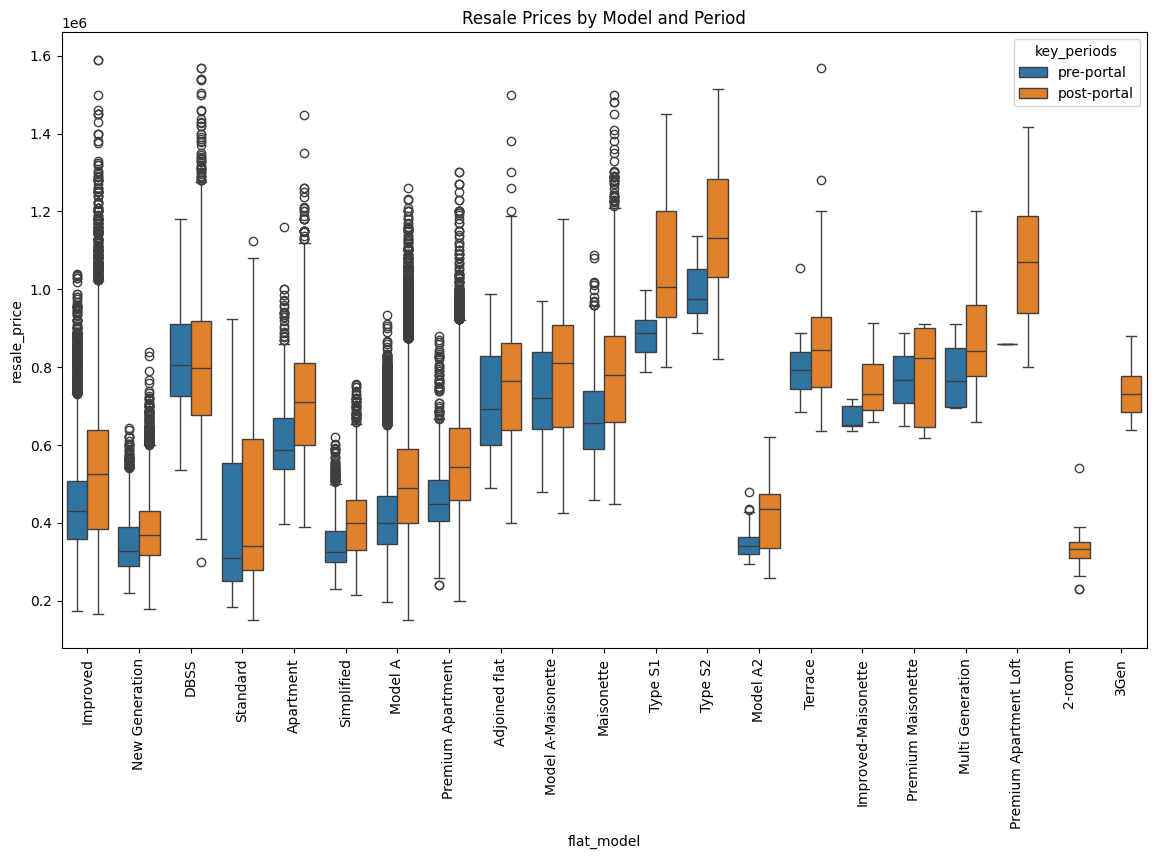

In [13]:
# Boxplot for resale prices by model and period
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='flat_model', y='resale_price', hue='key_periods')
plt.title('Resale Prices by Model and Period')
plt.xticks(rotation=90)
plt.show()

In [14]:
# List of flat models that never existed pre-portal launch
new_flat_models = ['Premium Apartment Loft', '2-room', '3Gen']

# Filter the data for these flat models in the post-portal period
filtered_models_df = filtered_df[(filtered_df['flat_model'].isin(new_flat_models)) & (filtered_df['key_periods'] == 'post-portal')]

# Calculate the average resale price
average_resale_price_new_models = filtered_models_df['resale_price'].mean()
print(round(average_resale_price_new_models,2)*0.1)

56769.409


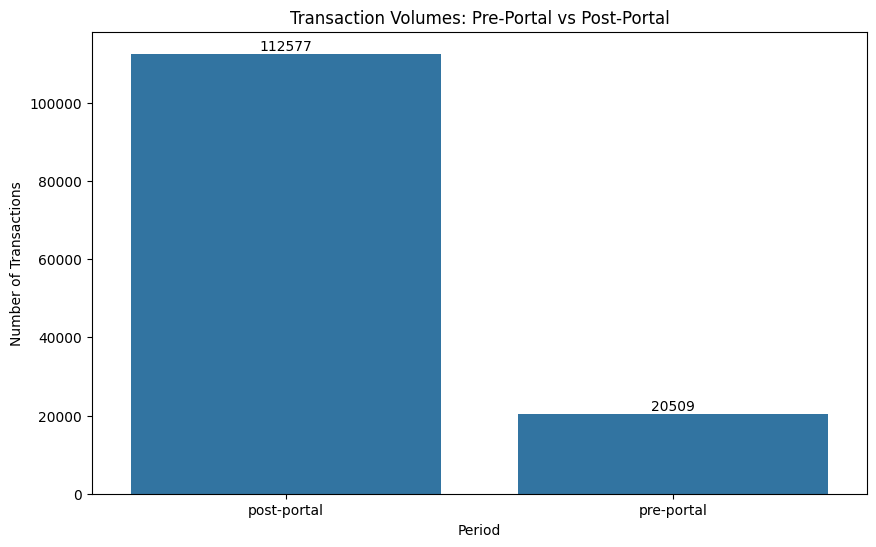

In [15]:
# Calculate transaction volumes
transaction_volumes = filtered_df.groupby(['key_periods']).size().reset_index(name='transaction_count')

# Plot transaction volumes
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=transaction_volumes, x='key_periods', y='transaction_count')

# Add bar labels
bar_plot.bar_label(bar_plot.containers[0])

plt.title('Transaction Volumes: Pre-Portal vs Post-Portal')
plt.xlabel('Period')
plt.ylabel('Number of Transactions')
plt.show()

/tmp/ipykernel_197030/521488667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['month'].dt.year


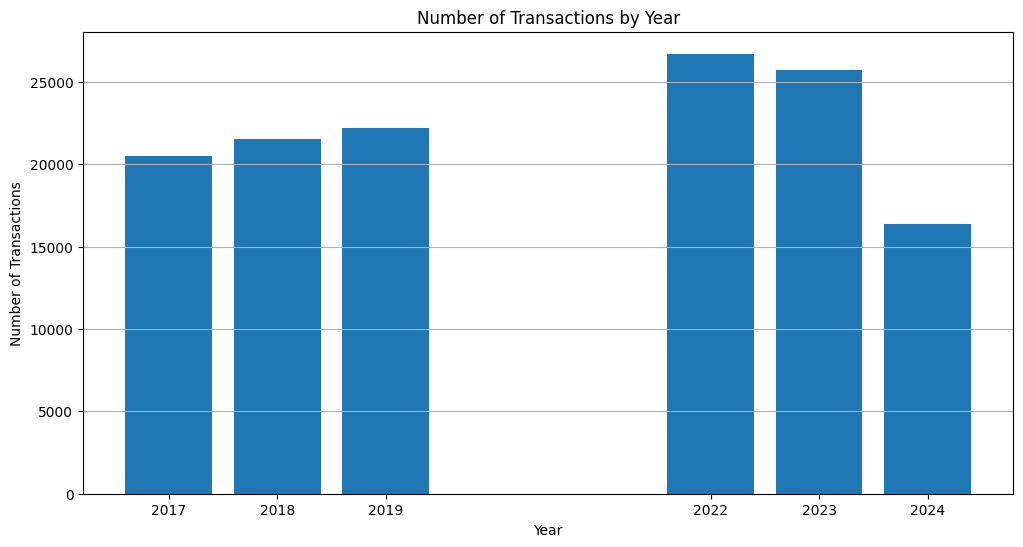

   year  transaction_count
0  2017              20509
1  2018              21561
2  2019              22186
3  2022              26720
4  2023              25756
5  2024              16354


In [16]:
# Extract the year from the 'month' column
filtered_df['year'] = filtered_df['month'].dt.year

# Group the data by year and count the number of transactions
transaction_counts_by_year = filtered_df.groupby('year').size().reset_index(name='transaction_count')

# Plot the transaction counts by year
plt.figure(figsize=(12, 6))
plt.bar(transaction_counts_by_year['year'], transaction_counts_by_year['transaction_count'])
plt.title('Number of Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.xticks(transaction_counts_by_year['year'])
plt.grid(axis='y')
plt.show()

# Display the transaction counts by year
print(transaction_counts_by_year)